# Working with data 2017. Class 3
## Contact
Javier Garcia-Bernardo
garcia@uva.nl

## 0. Structure
1. Stats
    - Definitions
    - What's a p-value?
    - One-tailed test vs two-tailed test
    - Count vs expected count (binomial test)
    - Independence between factors: ($\chi^2$ test)      
2. In-class exercises to melt, pivot, concat, merge, groupby and plot.
3. Read data from websited
4. Time series          

In [1]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np

def read_our_csv():
    #reading the raw data from oecd
    df = pd.read_csv("../class2/data/CITIES_19122016195113034.csv",sep="\t")

    #fixing the columns (the first one is ""METRO_ID"" instead of "METRO_ID")
    cols = list(df.columns)
    cols[0] = "METRO_ID"
    df.columns = cols
    
    #pivot the table
    column_with_values = "Value"
    column_to_split = ["VAR"]
    variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
    df_fixed = df.pivot_table(column_with_values,
                 variables_already_present,
                 column_to_split).reset_index()
    
    return df_fixed
    

In [5]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
from scipy.stats import chi2_contingency,ttest_ind

#This allows us to use R
%load_ext rpy2.ipython

#Visualize in line
%matplotlib inline


#Be able to plot images saved in the hard drive
from IPython.display import Image,display

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))


## 0. Mental note: Inkscape

## 0. Mental note 2: Heatmap
- Represent one quantitative variable as color, two qualitative (or binned quantitative) in the sides.

In [6]:
data = pd.read_csv("data/random.csv",sep="\t",index_col=0)*100
data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.792125,4.328658,9.011651,16.121389,18.150970,25.275589,40.135320,62.847962,65.262676,88.728721
1,1.555186,4.519362,10.829786,17.984566,33.347034,33.818201,53.992404,64.667989,74.147056,90.539389
2,2.147616,5.542409,12.883115,29.073379,33.405091,35.228187,57.395627,65.448382,74.892115,92.175600
3,4.570947,12.380003,23.304360,31.620259,41.491721,52.669751,61.816225,68.006430,77.918513,93.245446
4,4.682917,13.388454,28.881512,33.754225,41.969067,52.720898,62.035348,72.354987,80.207993,96.620716


In [2]:
import seaborn as sns
sns.heatmap?

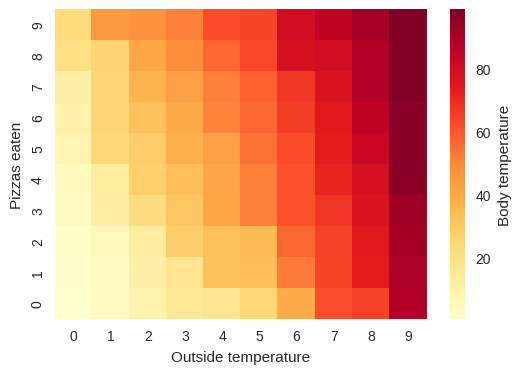

In [7]:
ax = sns.heatmap(data,cbar_kws={"label":"Body temperature"},cmap="YlOrRd")
ax.invert_yaxis()
plt.ylabel("Pizzas eaten")
plt.xlabel("Outside temperature")
plt.show()

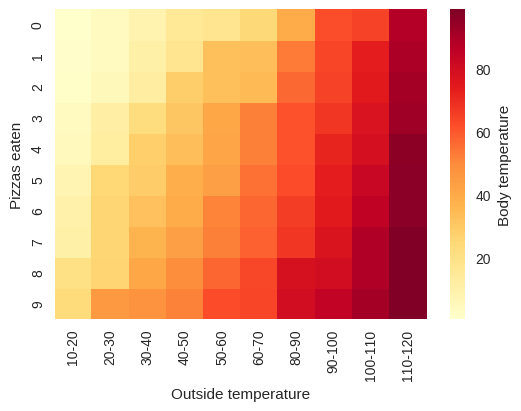

In [8]:
sns.heatmap(data,cbar_kws={"label":"Body temperature"},cmap="YlOrRd")
plt.ylabel("Pizzas eaten")
plt.xlabel("Outside temperature")
plt.xticks(0.5+np.arange(10),["10-20","20-30","30-40","40-50","50-60","60-70","80-90","90-100","100-110","110-120"],rotation=90)
plt.show()

Conclusion: Pizzas make you lekker warm

Lesson of the day: Eat more pizza

## 1. In-class exercises


## 1.1 Read the data from the world bank (inside class3 folder, then folder data, subfolder world_bank), and save it with name df


In [14]:
#Read data and print the head to see how it looks like
df = pd.read_csv("../class3/data/world_bank/data.csv",na_values="..")
df.head()

,Country Name,Country Code,Series Name,Series Code,1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,Netherlands,NLD,"Health expenditure, private (% of GDP)",SH.XPD.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.376684,1.361519,1.388759,1.394426,1.441308,1.483926,1.427731,1.416160,NaN,NaN
1,Netherlands,NLD,"Health expenditure, public (% of GDP)",SH.XPD.PUBL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.980489,8.209741,8.901517,9.081296,9.085858,9.528422,9.617135,9.481133,NaN,NaN
2,Netherlands,NLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,73.804146,73.612683,73.539512,73.58561,73.809512,73.727073,...,80.097561,80.251220,80.548780,80.702439,81.204878,81.104878,81.304878,81.304878,NaN,NaN
3,Colombia,COL,"Health expenditure, private (% of GDP)",SH.XPD.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.713840,1.921929,1.864133,1.781872,1.619624,1.655958,1.624282,1.791355,NaN,NaN
4,Colombia,COL,"Health expenditure, public (% of GDP)",SH.XPD.PUBL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.539527,4.698007,5.148274,4.975653,5.016165,5.277512,5.218918,5.409943,NaN,NaN


In [ ]:
#We could fix the column names with: df.columns = ["Country Name","Country Code","Series Name","Series Code",1967,1968,1969,...]

In [15]:
## 4.1b Fix the year of the column (make it numbers)
df = pd.read_csv("../class3/data/world_bank/data.csv",na_values="..")
old_columns = list(df.columns)

new_columns = []
for index,column_name in enumerate(old_columns):
    if index < 4: 
        new_columns.append(column_name)
    else:
        year_column = int(column_name[:4])
        new_columns.append(year_column)

df.columns = new_columns

#We could save our data with: df.to_csv("data/new_columns.csv",sep="\t")
df.head()

,Country Name,Country Code,Series Name,Series Code,1967,1968,1969,1970,1971,1972,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Netherlands,NLD,"Health expenditure, private (% of GDP)",SH.XPD.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.376684,1.361519,1.388759,1.394426,1.441308,1.483926,1.427731,1.416160,NaN,NaN
1,Netherlands,NLD,"Health expenditure, public (% of GDP)",SH.XPD.PUBL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.980489,8.209741,8.901517,9.081296,9.085858,9.528422,9.617135,9.481133,NaN,NaN
2,Netherlands,NLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,73.804146,73.612683,73.539512,73.58561,73.809512,73.727073,...,80.097561,80.251220,80.548780,80.702439,81.204878,81.104878,81.304878,81.304878,NaN,NaN
3,Colombia,COL,"Health expenditure, private (% of GDP)",SH.XPD.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.713840,1.921929,1.864133,1.781872,1.619624,1.655958,1.624282,1.791355,NaN,NaN
4,Colombia,COL,"Health expenditure, public (% of GDP)",SH.XPD.PUBL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.539527,4.698007,5.148274,4.975653,5.016165,5.277512,5.218918,5.409943,NaN,NaN


## 4.2 Fix the format and save it with name df_fixed
Remember, this was the code that we use to fix the file of the 
`
    ### Fix setp 1: Melt
    variables_already_presents = ['METRO_ID', 'Metropolitan areas','VAR']
    columns_combine = cols
    df = pd.melt(df,
               id_vars=variables_already_presents,
               value_vars=columns_combine,
               var_name="Year",
               value_name="Value")
    df.head()

    ### Fix step 2: Pivot
    column_with_values = "Value"
    column_to_split = ["VAR"]
    variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
    df.pivot_table(column_with_values,
                   variables_already_present,
                   column_to_split).reset_index().head()
`

In [19]:
### Fix setp 1: Melt
cols = list(df.columns)
variables_already_presents = cols[:4]
columns_combine = cols[4:]
df_1 = pd.melt(df,
           id_vars=variables_already_presents,
           value_vars=columns_combine,
           var_name="Year",
           value_name="Value")
df_1.head()


,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Netherlands,NLD,"Health expenditure, private (% of GDP)",SH.XPD.PRIV.ZS,1967,NaN
1,Netherlands,NLD,"Health expenditure, public (% of GDP)",SH.XPD.PUBL.ZS,1967,NaN
2,Netherlands,NLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1967,73.804146
3,Colombia,COL,"Health expenditure, private (% of GDP)",SH.XPD.PRIV.ZS,1967,NaN
4,Colombia,COL,"Health expenditure, public (% of GDP)",SH.XPD.PUBL.ZS,1967,NaN


In [20]:
### Fix step 2: Pivot
column_with_values = "Value"
column_to_split = ["Series Name"]
variables_already_present = ["Country Name","Country Code","Year"]
df_1.pivot_table(column_with_values,
               variables_already_present,
               column_to_split).reset_index().head()



Series Name,Country Name,Country Code,Year,"Health expenditure, private (% of GDP)","Health expenditure, public (% of GDP)","Life expectancy at birth, total (years)"
0,Colombia,COL,1967,NaN,NaN,59.840220
1,Colombia,COL,1968,NaN,NaN,60.195780
2,Colombia,COL,1969,NaN,NaN,60.537049
3,Colombia,COL,1970,NaN,NaN,60.873195
4,Colombia,COL,1971,NaN,NaN,61.211390


## 4.3 Create two dataframes with names df_NL and df_CO.
- The first with the data for the Netherlands
- The second with the data for Colombia

In [ ]:
#code
df_NL = 
df_CO = 

## 4.4 Concatenate/Merge (the appropriate one) the two dataframes

## 4.5 Create two dataframes with names df_pri and df_pu.
- The first with the data for all rows and columns "country", "year" and indicator "SH.XPD.PRIV.ZS" (expenditure in health care as %GDP) 
- The second with the data for all rows and columns "country", "year" and indicator "SH.XPD.PUBL.ZS"

In [ ]:
df_pri = 
df_pu = 

## 4.6 Concatenate/Merge (the appropriate one) the two dataframes (how = "outer")

## 4.7 Groupby the last dataframe (step 4.6) by country code and describe
- If you don't remember check class3c_groupby.ipynb

## 4.8 Groupby  the last dataframe (step 4.6) by country code and find skewness
- A skewness value > 0 means that there is more weight in the left tail of the distribution.
- If you don't remember check class3c_groupby.ipynb

In [31]:
import scipy.stats #you need to import scipy.stats


,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Code,,,,,,,,,,,,,,,,,,,,,
COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.722427,1.722766,1.719063,1.719874,1.718376,1.716521,1.716847,1.716647,NaN,NaN
ESP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.717436,1.714439,1.708323,1.709427,1.712325,1.715990,1.717601,1.718622,NaN,NaN
NLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.687594,1.684330,1.674628,1.672061,1.673447,1.666647,1.664623,1.666758,NaN,NaN
